# Introduction
This document provides a summary of real estate sales for Garfield County from July 2014 through June 2016 using data available from the __[Garfield County Assessor](https://www.garfield-county.com/assessor/comparable-sales.aspx)__. According to the Garfield County Assessor, data July 2016 through June 2018 will be available in May 2019.

In [1]:
# Load required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
# plt.style.use('dark_background') # Only for when I want to work in dark mode

# Import and inspect the datasets

In [2]:
# Import single family home sales data and view first few rows
single_family = pd.read_csv("2017-comparable-sales-single-family.csv")
single_family.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal
0,R340967,239334401005,879240,6/29/2016,"$650,000",000066 N 2ND ST,CARBONDALE,ONE STORY,1970.0,0.0,0.00,0.0,Section: 34 Township: 7 Range: 88 Subdivision:...
1,R340073,239334200010,870778,11/24/2015,"$560,000",000276 10TH ST,CARBONDALE,ONE STORY,1971.0,1.0,1.00,480.0,Section: 34 Township: 7 Range: 88 TR IN LOT 5
2,R112063,239335100057,869383,10/13/2015,"$2,750,000",000855 ROSE LN,CARBONDALE,ONE STORY,2002.0,0.0,0.75,680.0,Section: 35 Township: 7 Range: 88 A TR IN LOTS...
3,R580140,239334366004,857328,12/18/2014,"$630,500",000640 LINCOLN AVE,CARBONDALE,ONE,1999.0,1.0,1.00,710.0,Section: 34 Township: 7 Range: 88 - Subdivisio...
4,R043949,239120300276,853541,9/12/2014,"$2,800,000",102 COUNTY RD,CARBONDALE,ONE STORY,2008.0,2.0,1.00,764.0,Section: 20 Township: 7 Range: 87 A TR IN THE ...


In [3]:
# View column names
single_family.columns

Index(['Account', 'Parcel Number', 'Reception', 'Sale Date', 'Sale Price',
       'Situs Address', 'Location', 'Architectural Style', 'Year Built',
       'Bedrooms', 'Baths', 'Heated Area', 'Legal'],
      dtype='object')

In [4]:
# Check column types
single_family.dtypes

Account                 object
Parcel Number           object
Reception               object
Sale Date               object
Sale Price              object
Situs Address           object
Location                object
Architectural Style     object
Year Built             float64
Bedrooms               float64
Baths                  float64
Heated Area            float64
Legal                   object
dtype: object

Sale Price will need to be converted to numeric (integer) and Sale Date will need to be converted to a Date type. Because there are no decimal numbers in this dataset, numeric fields would be best represented as integer types. For efficiency, updates will be made after the two datasets have been combined.

In [5]:
# Import condo and townhome sales data and view first few rows
condo_townhome = pd.read_csv("2017-comparable-sales-condos-townhomes.csv")
condo_townhome.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Actual Year Built,Bedrooms,Baths,Heated Area,Legal
0,R007341,239334430001,852413,8/8/2014,"$210,000",000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...
1,R340686,239334350003,871451,12/11/2015,"$265,000",213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...
2,R045341,23933430G008,861415,4/14/2015,"$308,500",000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...
3,R340803,246303105047,872689,1/20/2016,"$160,000",000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...
4,R044451,239333149008,875851,4/8/2016,"$340,000",001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...


In [6]:
# View column names
condo_townhome.columns

Index(['Account', 'Parcel Number', 'Reception', 'Sale Date', 'Sale Price',
       'Situs Address', 'Location', 'Classification', 'Architectural Style',
       'Actual Year Built', 'Bedrooms', 'Baths', 'Heated Area', 'Legal'],
      dtype='object')

In the condos and townhomes dataset there are two differences: (1) this dataset has an additional column "Classification" and (2) the column "Actual Year Built" is the name of the column called "Year Built" in the single family homes dataset. 

In [7]:
# Rename "Actual Year Built" column name to "Year Built" to match single homes dataset
condo_townhome = condo_townhome.rename(columns={"Actual Year Built": "Year Built"})
condo_townhome.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal
0,R007341,239334430001,852413,8/8/2014,"$210,000",000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...
1,R340686,239334350003,871451,12/11/2015,"$265,000",213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...
2,R045341,23933430G008,861415,4/14/2015,"$308,500",000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...
3,R340803,246303105047,872689,1/20/2016,"$160,000",000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...
4,R044451,239333149008,875851,4/8/2016,"$340,000",001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...


In [8]:
# Add Classification column to single family dataframe and populate with "Single Family"
single_family["Classification"] = "Single Family"
single_family.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal,Classification
0,R340967,239334401005,879240,6/29/2016,"$650,000",000066 N 2ND ST,CARBONDALE,ONE STORY,1970.0,0.0,0.00,0.0,Section: 34 Township: 7 Range: 88 Subdivision:...,Single Family
1,R340073,239334200010,870778,11/24/2015,"$560,000",000276 10TH ST,CARBONDALE,ONE STORY,1971.0,1.0,1.00,480.0,Section: 34 Township: 7 Range: 88 TR IN LOT 5,Single Family
2,R112063,239335100057,869383,10/13/2015,"$2,750,000",000855 ROSE LN,CARBONDALE,ONE STORY,2002.0,0.0,0.75,680.0,Section: 35 Township: 7 Range: 88 A TR IN LOTS...,Single Family
3,R580140,239334366004,857328,12/18/2014,"$630,500",000640 LINCOLN AVE,CARBONDALE,ONE,1999.0,1.0,1.00,710.0,Section: 34 Township: 7 Range: 88 - Subdivisio...,Single Family
4,R043949,239120300276,853541,9/12/2014,"$2,800,000",102 COUNTY RD,CARBONDALE,ONE STORY,2008.0,2.0,1.00,764.0,Section: 20 Township: 7 Range: 87 A TR IN THE ...,Single Family


# Combine the datasets

In [9]:
# Check total number of rows and columns before combining
single_family.shape

(1369, 14)

In [10]:
# Check total number of rows and columns before combining
condo_townhome.shape

(606, 14)

In [11]:
# Number of rows expected in the combined datasets
1369 + 606

1975

In [12]:
# Because condo_townhome has an extra column, the single_family dataset will be appended to the bottom
combined = pd.concat([condo_townhome, single_family], axis=0) # axis set 
combined.head()

/Users/caseybates/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Account,Architectural Style,Baths,Bedrooms,Classification,Heated Area,Legal,Location,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Year Built
0,R007341,CONDO,1.0,1.0,Condo,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,CARBONDALE,239334430001,852413,8/8/2014,"$210,000",000133 SOPRIS AVE #A,1974.0
1,R340686,CONDO,1.0,1.0,Condo,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,CARBONDALE,239334350003,871451,12/11/2015,"$265,000",213 1/2 N 10TH ST #C,1980.0
2,R045341,CONDO,1.0,1.0,Condo,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,CARBONDALE,23933430G008,861415,4/14/2015,"$308,500",000345 COLORADO AVE #202,2008.0
3,R340803,CONDO,1.0,1.0,Condo,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,CARBONDALE,246303105047,872689,1/20/2016,"$160,000",000086 ROARING FORK AVE #C3,1981.0
4,R044451,CONDO,1.0,2.0,Condo,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,CARBONDALE,239333149008,875851,4/8/2016,"$340,000",001913 DOLORES WAY,2007.0


In [13]:
# Set "sort=False" based on FutureWarning seen above; sorting is not required in this case.
combined = pd.concat([condo_townhome, single_family], axis=0, sort=False) # axis set 
combined.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal
0,R007341,239334430001,852413,8/8/2014,"$210,000",000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...
1,R340686,239334350003,871451,12/11/2015,"$265,000",213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...
2,R045341,23933430G008,861415,4/14/2015,"$308,500",000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...
3,R340803,246303105047,872689,1/20/2016,"$160,000",000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...
4,R044451,239333149008,875851,4/8/2016,"$340,000",001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...


In [14]:
# Check tail to verify that "Classification" is "Single Family" for single family homes
combined.tail()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal
1364,R351092,217902331039,862783,5/15/2015,"$419,000",002010 MORNING STAR DR,SILT,Single Family,TWO STORY WITH BASEMENT,2006.0,5.0,4.00,3610.0,Section: 2 Township: 6 Range: 92 Subdivision: ...
1365,R200040,212736400009,863763,6/5/2015,"$605,000",285 PANORAMIC DR,SILT,Single Family,ONE STORY WITH BASEMENT,2005.0,4.0,3.00,4062.0,Section: 36 Township: 5 Range: 92 Subdivision:...
1366,R041390,217904200707,853722,9/17/2014,"$402,000",000095 LONE PINON LN,SILT,Single Family,TWO STORY WITH BASEMENT,2007.0,5.0,3.25,4348.0,Section: 4 Township: 6 Range: 92 ANTLERS ORCHA...
1367,R041390,217904200707,860466,3/13/2015,"$540,000",000095 LONE PINON LN,SILT,Single Family,TWO STORY WITH BASEMENT,2007.0,5.0,3.25,4348.0,Section: 4 Township: 6 Range: 92 ANTLERS ORCHA...
1368,R041246,217905202021,877699,5/25/2016,"$800,000",000565 N MEADOW DR,SILT,Single Family,ONE STORY WITH BASEMENT,2008.0,5.0,4.50,5601.0,Section: 5 Township: 6 Range: 92 Subdivision: ...


In [15]:
# Check shape (# of rows, # of columns) of combined dataset to see of number of rows matches expected (1975)
combined.shape

(1975, 14)

In [16]:
# Double check column names
combined.columns

Index(['Account', 'Parcel Number', 'Reception', 'Sale Date', 'Sale Price',
       'Situs Address', 'Location', 'Classification', 'Architectural Style',
       'Year Built', 'Bedrooms', 'Baths', 'Heated Area', 'Legal'],
      dtype='object')

In [17]:
# Spot check unique values from select columns to make sure there are no unexpected values
print(combined["Location"].unique())
print(combined["Classification"].unique())
print(combined["Architectural Style"].unique())
print(combined["Year Built"].unique())
print(combined["Baths"].unique())
print(combined["Bedrooms"].unique())

['CARBONDALE' 'GLENWOOD' 'NEW CASTLE' 'PARACHUTE' 'RIFLE' 'SILT']
['Condo' 'Townhome' 'Garage Only' 'Single Family']
['CONDO' 'TWO STORY' 'BI LEVEL' 'ONE STORY W/ BSMT' 'TRI LEVEL'
 'TWO STORY W/ BSMT' 'ONE STORY' 'THREE STORY' 'SPLIT LEVEL'
 'ONE WITH HALF STORY' nan 'MANUFACTURED HUD' 'ONE' 'STRAW BALE'
 'ONE STORY WITH BASEMENT' 'TWO STORY WITH BASEMENT'
 'MODULAR WITH ADDITION' 'MODULAR UBC IRC' 'LOG HOME' 'RECREATIONAL CABIN'
 'BARN WITH LIVING' 'MANUFACTURED HUD WITH ADDN' 'PRE HUD MOBILE HOME']
[1974. 1980. 2008. 1981. 2007. 1972. 2005. 1983. 1996. 1979. 1997. 2006.
 1976. 1973. 1956. 1991. 1992. 2002. 1990. 1982. 1994. 1989. 2004. 1999.
 1998. 1995. 2013. 2000. 1977. 2003. 2001. 2014. 2010. 2009. 1968. 1904.
 1978. 1984. 1993. 1967. 1898. 1970. 1975. 2015.   nan 1971. 1957. 1923.
 1888. 1883. 1958. 1960. 1966. 1988. 1959. 1985. 1951. 1953. 1947. 1950.
 1961. 1948. 1964. 1901. 1905. 1908. 1893. 1962. 1889. 1954. 1936. 1903.
 1963. 1938. 1887. 2016. 1949. 1897. 1969. 1940. 1937. 

The "nan" values in the "Architectural Style" and "Year Built" columns may require further investigation.

In [18]:
# Add a count column with value of 1 in each row for easy summation of sales
combined.loc[:,"Count"] = int(1)
combined.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal,Count
0,R007341,239334430001,852413,8/8/2014,"$210,000",000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,1
1,R340686,239334350003,871451,12/11/2015,"$265,000",213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1
2,R045341,23933430G008,861415,4/14/2015,"$308,500",000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,1
3,R340803,246303105047,872689,1/20/2016,"$160,000",000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,1
4,R044451,239333149008,875851,4/8/2016,"$340,000",001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,1


Initially I tried this:

combined["Count"] = int(1)

But got this warning: "A value is trying to be set on a copy of a slice from a DataFrame. Try using '.loc[row_indexer,col_indexer] = value' instead

__[See the caveats in the documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy)__

# Inspect and clean the data

In [19]:
# Check column types
combined.dtypes

Account                 object
Parcel Number           object
Reception               object
Sale Date               object
Sale Price              object
Situs Address           object
Location                object
Classification          object
Architectural Style     object
Year Built             float64
Bedrooms               float64
Baths                  float64
Heated Area            float64
Legal                   object
Count                    int64
dtype: object

In [20]:
# Convert Sale Price column to integer (remove "$" and "," characters)
combined["Sale Price"] = combined["Sale Price"].str.replace("$","").str.replace(",","").astype(int)
combined["Sale Price"].dtypes

dtype('int64')

In [21]:
# Convert Sale Date column to datetime format
combined["Sale Date"] = pd.to_datetime(combined["Sale Date"])
combined["Sale Date"].dtypes

dtype('<M8[ns]')

In [22]:
# Double check that Sale Date and Sale Price columns look okay
combined.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Heated Area,Legal,Count
0,R007341,239334430001,852413,2014-08-08,210000,000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,1
1,R340686,239334350003,871451,2015-12-11,265000,213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1
2,R045341,23933430G008,861415,2015-04-14,308500,000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,1
3,R340803,246303105047,872689,2016-01-20,160000,000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,1
4,R044451,239333149008,875851,2016-04-08,340000,001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,1


In [23]:
# Rename "Heated Area" column to "Square Feet" to be more intuitive (although not entirely accurate)
combined = combined.rename(columns={"Heated Area": "Square Feet"})
combined.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count
0,R007341,239334430001,852413,2014-08-08,210000,000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,1
1,R340686,239334350003,871451,2015-12-11,265000,213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1
2,R045341,23933430G008,861415,2015-04-14,308500,000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,1
3,R340803,246303105047,872689,2016-01-20,160000,000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,1
4,R044451,239333149008,875851,2016-04-08,340000,001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,1


In [24]:
# Add a price per square foot column
combined.loc[:,"Price per SF"] = combined.loc[:,"Sale Price"] / combined.loc[:,"Square Feet"]
combined.head()

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF
0,R007341,239334430001,852413,2014-08-08,210000,000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,1,338.164251
1,R340686,239334350003,871451,2015-12-11,265000,213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1,362.021858
2,R045341,23933430G008,861415,2015-04-14,308500,000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,1,389.520202
3,R340803,246303105047,872689,2016-01-20,160000,000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,1,200.000000
4,R044451,239333149008,875851,2016-04-08,340000,001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,1,393.518519


In [25]:
# Check summary statistics for Sale Price column
combined["Sale Price"].describe()

count    1.975000e+03
mean     3.779507e+05
std      3.282798e+05
min      2.500000e+03
25%      1.992500e+05
50%      2.950000e+05
75%      4.380000e+05
max      2.800000e+06
Name: Sale Price, dtype: float64

Total count matches the number of rows in the dataframe. Min and max values seem reasonable at $25k$, and 2.8 M, respectively. Median price of $295k, for this dataset which combines townhomes/condos and single family homes.

In [26]:
# Check summary statistics for Year Built column
combined["Year Built"].describe()

count    1966.000000
mean     1991.415565
std        22.380215
min      1883.000000
25%      1981.000000
50%      1999.000000
75%      2006.000000
max      2016.000000
Name: Year Built, dtype: float64

Total count is slightly lower at 1966 of 1975. Year Built ranges from 1883 to 2016.

In [27]:
# Check summary statistics for Location column
combined["Location"].describe()

count         1975
unique           6
top       GLENWOOD
freq           441
Name: Location, dtype: object

Count matches total rows in dataframe. Not surprisingly, Glenwood Springs which is the largest city in Garfield County has the highest number of recorded sales.

In [28]:
# Check summary statistics for Architectural Style column
combined["Architectural Style"].describe()

count          1966
unique           22
top       TWO STORY
freq            592
Name: Architectural Style, dtype: object

Similar to the Year Built column, 9 entries appear to have no value. 

In [29]:
# Check summary statistics for Bedrooms column
combined["Bedrooms"].describe()

count    1966.000000
mean        3.033062
std         0.868695
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: Bedrooms, dtype: float64

Again, it looks like there are 9 rows with missing values. The middle fifty percent (the interquartile range) is 3 bedrooms, meaning at least 50% sales have 3 bedrooms.

In [30]:
# Check summary statistics for Baths column
combined["Baths"].describe()

count    1966.000000
mean        2.294939
std         0.777044
min         0.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.250000
Name: Baths, dtype: float64

Again we are seeing 9 missing values. At least fifty percent of homes have 2 - 2.5 baths. 

In [31]:
# Check summary statistics for Square Feet column
combined["Square Feet"].describe()

count    1966.000000
mean     1896.949288
std       902.107233
min         0.000000
25%      1342.500000
50%      1654.000000
75%      2259.750000
max      6864.000000
Name: Square Feet, dtype: float64

The minimum size of zero square feet indicates that there are some entries that could be vacant land, or did not have square footage data available.

In [32]:
# All of the numeric columns summarized together (specified "np.datetime64" to get the date column)
combined.describe(include=[np.number, np.datetime64])

,Sale Date,Sale Price,Year Built,Bedrooms,Baths,Square Feet,Count,Price per SF
count,1975,1.975000e+03,1966.000000,1966.000000,1966.000000,1966.000000,1975.0,1966.000000
unique,484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2014-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.779507e+05,1991.415565,3.033062,2.294939,1896.949288,1.0,inf
std,NaN,3.282798e+05,22.380215,0.868695,0.777044,902.107233,0.0,NaN
min,NaN,2.500000e+03,1883.000000,0.000000,0.000000,0.000000,1.0,12.009608
25%,NaN,1.992500e+05,1981.000000,3.000000,2.000000,1342.500000,1.0,129.689586


Observations from the summary statistics above:
* This database contains sales beginning 2014-07-01 through 2016-06-30
* Median sales price for all sales is 295,000, the mean is around 378,000
* Year built spans 1883 to 2016, with the median year built of 1999
* Need to investigate the minimum values of zero for Bedrooms, Baths and Square Feet columns


In [33]:
# And here's the summary stats for all columns
combined.describe(include=[np.object])

,Account,Parcel Number,Reception,Situs Address,Location,Classification,Architectural Style,Legal
count,1975,1975,1975,1963,1975,1975,1966,1975
unique,1793,1793,1910,1781,6,4,22,1789
top,R360180,212725400053,858946,000588 250 COUNTY RD,GLENWOOD,Single Family,TWO STORY,Section: 25 Township: 5 Range: 92 TR IN SWSE C...
freq,4,4,23,4,441,1369,592,4


In [34]:
# Inspect the null values for Square Feet column
nulls = combined[combined["Square Feet"].isnull()]
nulls

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF
421,R045151,218101228002,858630,2015-01-16,2500,NaN,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2A RIVER PAR...,1,NaN
422,R045153,218101228004,857083,2014-12-11,5000,NaN,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2A RIVER PAR...,1,NaN
423,R045154,218101228005,867928,2015-08-31,6000,NaN,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2A RIVER PAR...,1,NaN
424,R045156,218101228007,857084,2014-12-11,5000,NaN,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2A RIVER PAR...,1,NaN
425,R045157,218101228008,877470,2016-05-20,216000,NaN,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2A RIVER PAR...,1,NaN
426,R045178,218101229004,857085,2014-12-11,5000,#2D,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2B RIVER PAR...,1,NaN
427,R045180,218101229006,857086,2014-12-11,5000,#2F,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2B RIVER PAR...,1,NaN
428,R045184,218101229010,857087,2014-12-11,5000,#2K,NEW CASTLE,Garage Only,NaN,NaN,NaN,NaN,NaN,DESC: A RESUB OF A PORTION OF LOT 2B RIVER PAR...,1,NaN
241,R820107,239319203016,855034,2014-10-20,1230000,000284 MIDLAND LOOP,CARBONDALE,Single Family,NaN,NaN,NaN,NaN,NaN,Section: 19 Township: 7 Range: 88 Subdivision:...,1,NaN


There are 9 rows with NaN values for many of the columns valuable to this analysis (Year Built, Bedrooms, Baths, etc). 8 of these are type "Garage Only" which are not relevant to this analysis and should be removed from the dataframe! These 9 rows will be removed from the dataset moving forward.  

In [35]:
# Drop NaN values from Combined dataframe, subsetting by the Square Feet column. Check df shape. 
combined = combined.dropna(subset=["Square Feet"])
combined.shape

(1966, 16)

In [36]:
# Verify that "Garage Only" values are no longer present in the dataframe
# This would have been good to catch and remove earlier in the data cleaning process!
print(combined["Classification"].unique())

['Condo' 'Townhome' 'Single Family']


In [37]:
# Double check that there are no missing values for the columns important for this analyis
double_check = combined.dropna(subset=["Sale Date", "Sale Price", "Year Built", "Location","Bedrooms", "Baths"])
double_check.shape

(1966, 16)

Looks good, no additional rows were dropped from the check of these columns.

In [38]:
# A different look at overall info 
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1368
Data columns (total 16 columns):
Account                1966 non-null object
Parcel Number          1966 non-null object
Reception              1966 non-null object
Sale Date              1966 non-null datetime64[ns]
Sale Price             1966 non-null int64
Situs Address          1959 non-null object
Location               1966 non-null object
Classification         1966 non-null object
Architectural Style    1966 non-null object
Year Built             1966 non-null float64
Bedrooms               1966 non-null float64
Baths                  1966 non-null float64
Square Feet            1966 non-null float64
Legal                  1966 non-null object
Count                  1966 non-null int64
Price per SF           1966 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(8)
memory usage: 261.1+ KB


In [39]:
# Distribution of counts for bedrooms
combined["Bedrooms"].value_counts().sort_index(ascending=True)

0.0       7
1.0      51
2.0     385
3.0    1061
4.0     369
5.0      76
6.0      16
7.0       1
Name: Bedrooms, dtype: int64

In [40]:
# Distribution of counts for Baths
combined["Baths"].value_counts().sort_index(ascending=True)

0.00      4
0.75      8
1.00    165
1.50     91
1.70     42
1.75    115
2.00    595
2.20      4
2.25     43
2.50    472
2.70     10
2.75     49
3.00    125
3.20      1
3.25     30
3.50    132
3.70      1
3.75      8
4.00     15
4.25      7
4.50     34
4.75      2
5.00      4
5.25      2
5.50      4
6.00      2
6.25      1
Name: Baths, dtype: int64

In [41]:
# Sales with Square Feet value of zero.
combined[combined["Square Feet"] == 0]

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF
0,R340967,239334401005,879240,2016-06-29,650000,000066 N 2ND ST,CARBONDALE,Single Family,ONE STORY,1970.0,0.0,0.0,0.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1,inf


Ealier in this notebook the column "Heated Area" was changed to "Square Feet". It is possible that the structure above has no heat and therefore was recorded with a value of zero. This structure also has no bedrooms or baths, but has a sale price of \$650,000 indicating that this is possibly primarily a land/acreage transaction. 

In [42]:
# Evaluate sales with zero bedrooms
combined[combined["Bedrooms"] == 0]

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF
0,R340967,239334401005,879240,2016-06-29,650000,000066 N 2ND ST,CARBONDALE,Single Family,ONE STORY,1970.0,0.0,0.00,0.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1,inf
2,R112063,239335100057,869383,2015-10-13,2750000,000855 ROSE LN,CARBONDALE,Single Family,ONE STORY,2002.0,0.0,0.75,680.0,Section: 35 Township: 7 Range: 88 A TR IN LOTS...,1,4044.117647
242,R080539,239533200049,863791,2015-06-04,125000,NaN,GLENWOOD,Single Family,RECREATIONAL CABIN,2005.0,0.0,0.00,120.0,Section: 33 Township: 7 Range: 89 NENW.,1,1041.666667
511,R170410,218332101001,872474,2016-01-13,485000,008149 312 COUNTY RD,NEW CASTLE,Single Family,BARN WITH LIVING,2000.0,0.0,0.75,1076.0,Section: 32 Township: 6 Range: 90 Subdivision:...,1,450.743494
726,R270089,217531200010,879029,2016-06-27,395000,000948 323 COUNTY RD,PARACHUTE,Single Family,ONE STORY,1955.0,0.0,0.00,320.0,Section: 31 Township: 6 Range: 94 TR OF LAND S...,1,1234.375000
1175,R023273,217915402017,874126,2016-02-24,415000,000171 UTE AVE,SILT,Single Family,ONE STORY,2006.0,0.0,0.75,182.0,Section: 15 Township: 6 Range: 92 Subdivision:...,1,2280.219780
1176,R210816,192327400064,877726,2016-05-27,407000,009404 325 HWY,SILT,Single Family,ONE STORY WITH BASEMENT,1930.0,0.0,0.00,280.0,Section: 27 Township: 4 Range: 92 A TR IN SWSE...,1,1453.571429


This query pulls in the observation discussed in the last cell. In addition there are other observations architectural style "one story", as well as "recreational cabin" and "barn with living". It seems reasonable that any of these transactions could require an inspection, so they will be retained in the dataframe moving forward. Looking at the sale price for many of these transactions, it is possible that most of the value associated with the sale is for land/acreage.

In [43]:
# Evaluate sales with zero baths
combined[combined["Baths"] == 0]

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF
0,R340967,239334401005,879240,2016-06-29,650000,000066 N 2ND ST,CARBONDALE,Single Family,ONE STORY,1970.0,0.0,0.0,0.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1,inf
242,R080539,239533200049,863791,2015-06-04,125000,NaN,GLENWOOD,Single Family,RECREATIONAL CABIN,2005.0,0.0,0.0,120.0,Section: 33 Township: 7 Range: 89 NENW.,1,1041.666667
726,R270089,217531200010,879029,2016-06-27,395000,000948 323 COUNTY RD,PARACHUTE,Single Family,ONE STORY,1955.0,0.0,0.0,320.0,Section: 31 Township: 6 Range: 94 TR OF LAND S...,1,1234.375000
1176,R210816,192327400064,877726,2016-05-27,407000,009404 325 HWY,SILT,Single Family,ONE STORY WITH BASEMENT,1930.0,0.0,0.0,280.0,Section: 27 Township: 4 Range: 92 A TR IN SWSE...,1,1453.571429


All of the transactions above were discussed previously and will be retained in the dataframe moving forward. No further changes are required for the dataset.

Next step is to create a column called "Inspection Date" which is the approximate date of inspection for each sale. Google searches indicate that approximately 45 days is the normal time range between having an offer accepted and closing date. Inspections happen around 10 days after the inspection is accepted (35 days prior to closing). 

In [44]:
import datetime
diff = datetime.timedelta(days = 35) # Establish time difference of 35 days
combined["Inspection Date"] = combined["Sale Date"] - diff # Create Inspection Date column that's 35 days before sale
print(combined["Sale Date"].min()) # Check earliest date in Sale Date range
print(combined["Inspection Date"].min()) # Verify that the earliest date is 35 days earlier than previous
print(combined["Sale Date"].max()) # Repeat steps above for max (latest date)
print(combined["Inspection Date"].max())

2014-07-01 00:00:00
2014-05-27 00:00:00
2016-06-30 00:00:00
2016-05-26 00:00:00


The inspection date column looks as expected. Next step is to filter the dataframe to include only the columns we need for analysis.

In [45]:
# Columns to select
cols = ["Inspection Date", "Sale Date", "Sale Price", "Location", "Classification", "Architectural Style",
       "Year Built", "Bedrooms", "Baths", "Square Feet", "Count", "Price per SF"]
# Make copy of complete dataframe
combined_complete = combined
# Filter complete dataframe to include only desired columns
combined = combined[cols]
# Verify the dataframe includes the 12 columns selected
combined.head()

,Inspection Date,Sale Date,Sale Price,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Count,Price per SF
0,2014-07-04,2014-08-08,210000,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,1,338.164251
1,2015-11-06,2015-12-11,265000,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,1,362.021858
2,2015-03-10,2015-04-14,308500,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,1,389.520202
3,2015-12-16,2016-01-20,160000,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,1,200.000000
4,2016-03-04,2016-04-08,340000,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,1,393.518519


In [46]:
# Verify the copied dataframe includes the 14 original columns plus the new Inspection Date and Count columns
combined_complete.head() 

,Account,Parcel Number,Reception,Sale Date,Sale Price,Situs Address,Location,Classification,Architectural Style,Year Built,Bedrooms,Baths,Square Feet,Legal,Count,Price per SF,Inspection Date
0,R007341,239334430001,852413,2014-08-08,210000,000133 SOPRIS AVE #A,CARBONDALE,Condo,CONDO,1974.0,1.0,1.0,621.0,Section: 34 Township: 7 Range: 88 DESC: RESUB ...,1,338.164251,2014-07-04
1,R340686,239334350003,871451,2015-12-11,265000,213 1/2 N 10TH ST #C,CARBONDALE,Condo,CONDO,1980.0,1.0,1.0,732.0,Section: 34 Township: 7 Range: 88 Subdivision:...,1,362.021858,2015-11-06
2,R045341,23933430G008,861415,2015-04-14,308500,000345 COLORADO AVE #202,CARBONDALE,Condo,CONDO,2008.0,1.0,1.0,792.0,Section: 34 Township: 7 Range: 88 DESC: A RESU...,1,389.520202,2015-03-10
3,R340803,246303105047,872689,2016-01-20,160000,000086 ROARING FORK AVE #C3,CARBONDALE,Condo,CONDO,1981.0,1.0,1.0,800.0,Section: 3 Township: 8 Range: 88 DESC: BLDG 4 ...,1,200.000000,2015-12-16
4,R044451,239333149008,875851,2016-04-08,340000,001913 DOLORES WAY,CARBONDALE,Condo,CONDO,2007.0,2.0,1.0,864.0,Section: 33 Township: 7 Range: 88 DESC: A RESU...,1,393.518519,2016-03-04


In [47]:
# Double check shape of combined dataframe
combined.shape

(1966, 12)

In [48]:
# Double check shape of copied dataframe
combined_complete.shape

(1966, 17)

Now the combined dataframe is cleaned up and ready for exploratory data analysis.

# Exploratory data analysis and visualization

## Estimated timing of inspections

First step for exploratory data analysis will be to look at the estimated inspection date over time to get a feel for when home inspections may be at greatest (and lowest) demand. 

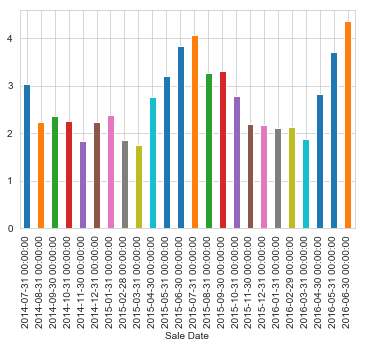

In [49]:
# Bar chart of mean home sales per day, grouped by month
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Count'].count() # Generate count of sales for each day
monthly = daily.groupby(pd.Grouper(freq='M')).mean() # Aggregate sales per day to generate mean value of sales per day, grouped by each month
ax = monthly.plot(kind='bar')

This example was developed based on the code found __[here](https://stackoverflow.com/questions/33350381/average-of-daily-count-of-records-per-month-in-a-pandas-dataframe)__.

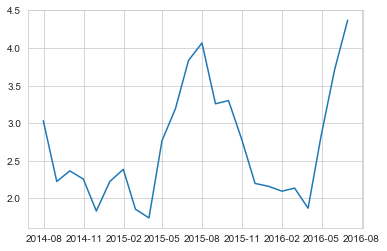

In [50]:
# Line plot in Seaborn using grouping by month - mean sales per day
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Count'].count() # Generate count of sales for each day
monthly = daily.groupby(pd.Grouper(freq='M')).mean() # Aggregate sales per day to generate sales count for each month
sns.lineplot(data=monthly)

The graph above shows strong seasonality in sales - the summer months are definitely the busiest for home sales.

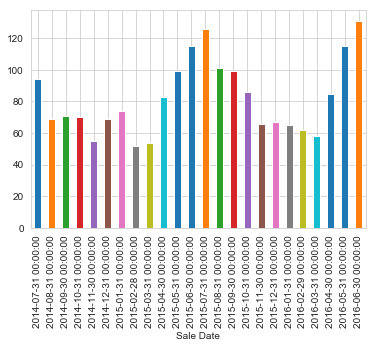

In [51]:
# Bar chart of total home sales per month, grouped by month
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Count'].count()
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='bar')

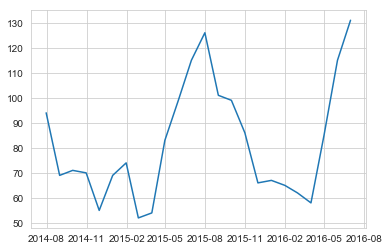

In [52]:
# Line plot in Seaborn using grouping by month - Sale Date
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Count'].count()
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
sns.lineplot(data=monthly)

In [53]:
# Raw count of sales per month for the two-year period, generated in the last chunk of code
monthly

Sale Date
2014-07-31     94
2014-08-31     69
2014-09-30     71
2014-10-31     70
2014-11-30     55
2014-12-31     69
2015-01-31     74
2015-02-28     52
2015-03-31     54
2015-04-30     83
2015-05-31     99
2015-06-30    115
2015-07-31    126
2015-08-31    101
2015-09-30     99
2015-10-31     86
2015-11-30     66
2015-12-31     67
2016-01-31     65
2016-02-29     62
2016-03-31     58
2016-04-30     85
2016-05-31    115
2016-06-30    131
Freq: M, Name: Count, dtype: int64

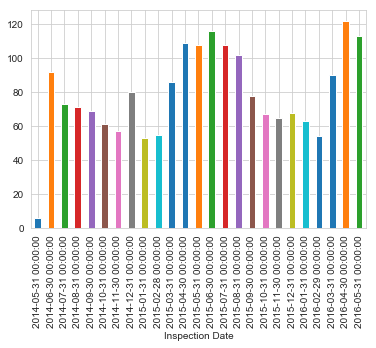

In [54]:
# Bar chart of estimated inspections required, grouped by month
daily = combined.set_index('Inspection Date').groupby(pd.Grouper(freq='D'))['Count'].count()
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='bar')

This shows essentially the same shape as total sales per month, but the inspection can be expected to take place ~35 days prior to closing.

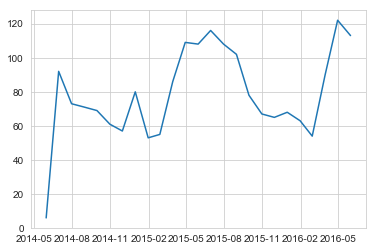

In [55]:
# Line plot in Seaborn using grouping by month - Inspection Date
daily = combined.set_index('Inspection Date').groupby(pd.Grouper(freq='D'))['Count'].count()
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
sns.lineplot(data=monthly)

In [56]:
# If you wanted, you could check the busiest days (theoretically) for inspection demand (remember this is Sale Date minus 35 days) during this two year period
inspection_date_counts = combined["Inspection Date"].value_counts()
inspection_date_counts.head(25)

2014-12-26    29
2015-07-24    20
2016-05-26    19
2016-04-22    18
2016-04-26    16
2016-05-13    14
2015-08-26    14
2014-06-26    13
2015-04-10    12
2014-07-25    12
2015-03-26    11
2016-01-22    11
2015-05-01    11
2015-05-08    10
2015-04-27    10
2016-03-11    10
2015-05-27    10
2015-07-03    10
2016-05-23    10
2014-11-14    10
2014-06-09     9
2015-08-28     9
2016-05-11     9
2015-06-10     9
2015-09-18     9
Name: Inspection Date, dtype: int64

It seems odd that the highest count day is in December, 2014 but there are no other days in the top 25 in the month of December. 

## Location of home sales

In [57]:
# Percentage of home sales per location during the two year period
locations = combined["Location"].value_counts(normalize=True).sort_values(ascending=False) * 100
locations

GLENWOOD      22.431333
RIFLE         19.989827
CARBONDALE    19.226857
NEW CASTLE    16.632757
SILT          11.444557
PARACHUTE     10.274669
Name: Location, dtype: float64

In [58]:
# Median values by location for numeric columns, all Classification types
combined.groupby("Location").median()

,Sale Price,Year Built,Bedrooms,Baths,Square Feet,Count,Price per SF
Location,,,,,,,
CARBONDALE,560000,1998.0,3.0,2.50,2020.0,1,262.090921
GLENWOOD,369000,1993.0,3.0,2.00,1716.0,1,202.963918
NEW CASTLE,293000,2002.0,3.0,2.25,1654.0,1,168.333333
PARACHUTE,164250,1998.0,3.0,2.00,1522.0,1,100.714678
RIFLE,218000,2000.0,3.0,2.00,1536.0,1,125.733753
SILT,273000,1999.0,3.0,2.00,1674.0,1,152.502637


In [59]:
# Median values by location and classificationfor numeric columns
classifications = combined.groupby(["Location", "Classification"]).median()
classifications

Sale Price  Year Built  Bedrooms  Baths  \
Location   Classification                                            
CARBONDALE Condo               280000      1980.5       2.0   1.75   
           Single Family       670000      1999.0       3.0   3.00   
           Townhome            382000      1997.0       3.0   2.50   
GLENWOOD   Condo               195750      1979.5       2.0   1.75   
           Single Family       450000      1993.0       3.0   2.50   
           Townhome            305000      1997.0       3.0   2.50   
NEW CASTLE Condo               152500      2007.0       2.0   2.00   
           Single Family       328200      1999.0       3.0   2.50   
           Townhome            252000      2006.0       3.0   2.50   
PARACHUTE  Single Family       168750      1998.0       3.0   2.00   
           Townhome            127750      1998.0       3.0   2.00   
RIFLE      Condo                63250      1981.0       2.0   1.00   
           Single Family       228000      1996.0       3.0   2.00   
           Townhome            154500      2007.0       3.0   2.50   
SILT       Condo                69000      1982.0       2.0   1.00   
           Single Family       289500      1999.0       3.0   2.00   
           Townhome            192000      2003.5       3.0   2.50   

                           Square Feet  Count  Price per SF  
Location   Classification                                    
CARBONDALE Condo                1200.0      1    240.833333  
           Single Family        2560.0      1    264.673913  
           Townhome             1554.0      1    255.455712  
GLENWOOD   Condo                 966.0      1    199.896480  
           Single Family        2211.5      1    209.467672  
           Townhome             1568.0      1    196.742671  
NEW CASTLE Condo                1056.0      1    145.044192  
           Single Family        1857.0      1    181.202546  
           Townhome             1483.0      1    162.938331  
PARACHUTE  Single Family        1529.0      1    104.401379  
           Townhome             1511.0      1     71.911359  
RIFLE      Condo                 884.5      1     72.493353  
           Single Family        1734.0      1    133.689840  
           Townhome             1417.0      1    110.040425  
SILT       Condo                 806.0      1     85.607940  
           Single Family        1740.5      1    157.328676  
           Townhome             1544.0      1    138.866335

Text(0.5,1,"Total Home Sales from July '14 thru June '16")

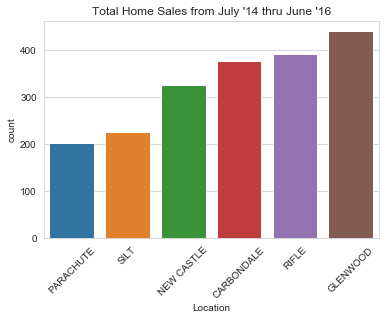

In [60]:
# Count plot of total sales by location, for the 2 year period, ordered low to high by location - all Classification types combined
ax = sns.countplot(x="Location", data=combined, order=reversed(combined['Location'].value_counts().index))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Total Home Sales from July \'14 thru June \'16')

Text(0.5,1,"Total Home Sales from July '14 thru June '16")

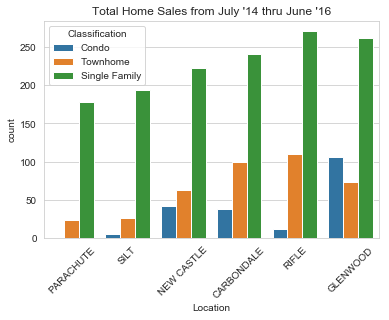

In [61]:
# Count plot of total sales by location, for the 2 year period, ordered low to high by location - Classification types shown separately
ax = sns.countplot(x="Location", data=combined, hue="Classification", 
                  order=reversed(combined['Location'].value_counts().index))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Total Home Sales from July \'14 thru June \'16')

## Square footage of home sales

In [62]:
# Establish dataframes separated by Single Family vs. Condo/Twonhome
single_fam = combined[combined["Classification"] == "Single Family"]
condo_townhome = combined[(combined["Classification"] == "Condo") | (combined["Classification"] == "Townhome")]

In [63]:
single_fam.shape

(1368, 12)

In [64]:
condo_townhome.shape

(598, 12)

In [65]:
1368 + 598

1966

/Users/caseybates/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Square Feet')

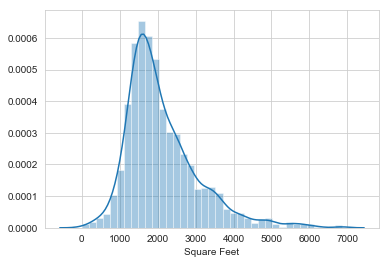

In [66]:
# The plot below is skewed to the right indicating that there are some outliers - some really big homes! 
sns.distplot(single_fam["Square Feet"])
plt.xlabel("Square Feet")

/Users/caseybates/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Square Feet')

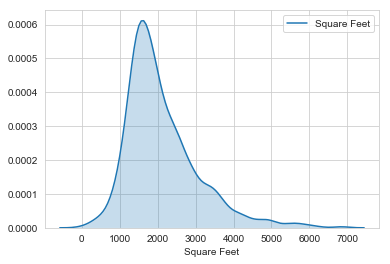

In [67]:
# Similar to the plot above, this shows the distribution of home sale square footage
sns.kdeplot(single_fam["Square Feet"], shade = True)
plt.xlabel("Square Feet")

Text(0.5,1,'Square Footage of All Home Types - Combined')

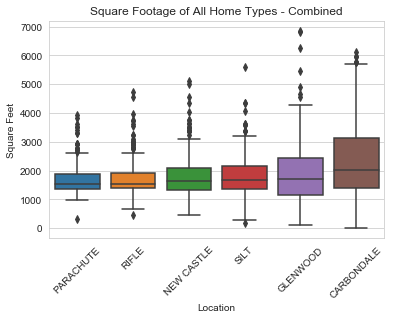

In [68]:
# Boxplot of Square Feet for each of the six locations, ordered low to high
ax = sns.boxplot(x="Location", y="Square Feet", data=combined, 
                 order = ["PARACHUTE", "RIFLE", "NEW CASTLE", "SILT", "GLENWOOD", "CARBONDALE"])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Square Footage of All Home Types - Combined')

The plot above is a boxplot. The box represents the middle 50% of values, which spans the 25th percentile to the 75th percentile. Read more about boxplots __[here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)__.

* A wider box indicates greater variability in the data (in this case, Carbondale has a wide range of home sizes, but the homes in Parachute are smaller and have less variability in size)
* The dots above the "whisker" represent "outliers" (really big or really small homes)
* The line in the middle of the box represents the median (the middle value) which has an equal number of points above and below it. 
* The median is less affected by outliers than the mean

Text(0.5,1,'Square Footage of All Home Types - Shown Separately')

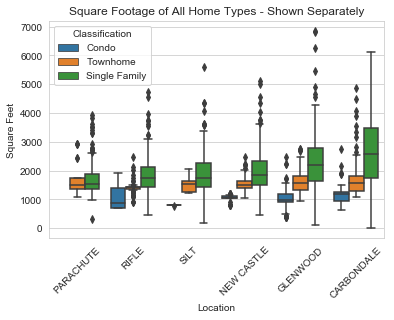

In [69]:
# Median values by location and classification for numeric columns
# Boxplot of Square Feet for each of the six locations, ordered low to high for single family sf
ax = sns.boxplot(x="Location", y="Square Feet", hue="Classification", data=combined, 
                 order = ["PARACHUTE", "RIFLE", "SILT", "NEW CASTLE", "GLENWOOD", "CARBONDALE"])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Square Footage of All Home Types - Shown Separately')

The plot above is a lot to take in, but it shows the spread of home size by location, and by home classification.

Text(0.5,1,'Square Footage of Single Family Homes')

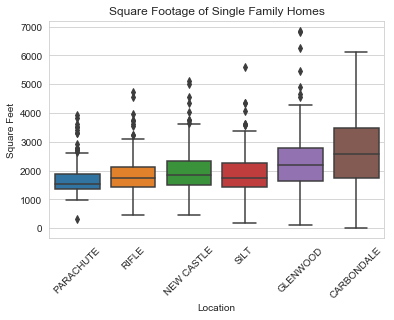

In [70]:
# Boxplot of Square Feet for Single Family Homes only, ordered low to high
ax = sns.boxplot(x="Location", y="Square Feet", data=single_fam, 
                 order = ["PARACHUTE", "RIFLE", "NEW CASTLE", "SILT", "GLENWOOD", "CARBONDALE"])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Square Footage of Single Family Homes')

In [71]:
# Median values for single family homes only, by location
single_fam.groupby("Location").median()

,Sale Price,Year Built,Bedrooms,Baths,Square Feet,Count,Price per SF
Location,,,,,,,
CARBONDALE,670000,1999.0,3.0,3.0,2560.0,1,264.673913
GLENWOOD,450000,1993.0,3.0,2.5,2211.5,1,209.467672
NEW CASTLE,328200,1999.0,3.0,2.5,1857.0,1,181.202546
PARACHUTE,168750,1998.0,3.0,2.0,1529.0,1,104.401379
RIFLE,228000,1996.0,3.0,2.0,1734.0,1,133.689840
SILT,289500,1999.0,3.0,2.0,1740.5,1,157.328676


## Year built

Text(0.5,1,'Year Built - All Home Types')

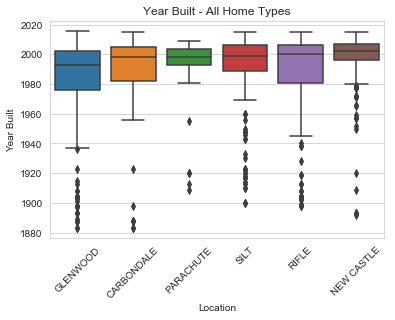

In [72]:
# Boxplot of Year Built for each of the six locations, ordered oldest to newest
ax = sns.boxplot(x="Location", y="Year Built", data=combined, 
                 order = ["GLENWOOD", "CARBONDALE", "PARACHUTE", "SILT", "RIFLE", "NEW CASTLE"])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Year Built - All Home Types')

The boxplot above is interesting because it shows that a vast majority of homes have been constructed since 1980 or later, for all locations, but there are some outliers (really old homes). So maybe a majority of homes in the county aren't at risk of having asbestos containing materials?

# Sale price

[None, None, None, None, None, None, None, None, None, None, None, None]

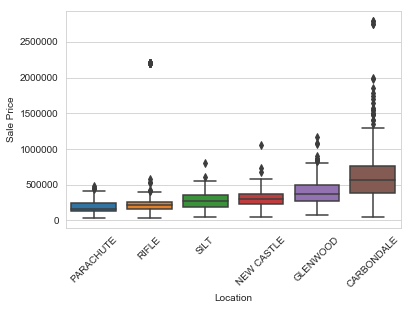

In [73]:
# Boxplot of Sale Price for each of the six locations, ordered low to high, all home types combined
ax = sns.boxplot(x="Location", y="Sale Price", data=combined, 
                 order = ["PARACHUTE", "RIFLE", "SILT", "NEW CASTLE", "GLENWOOD", "CARBONDALE"])
plt.setp(ax.get_xticklabels(), rotation=45)

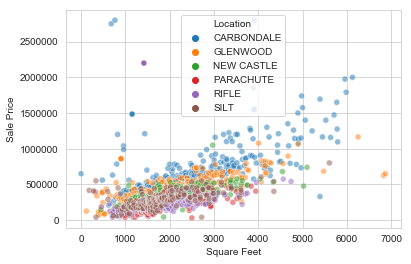

In [74]:
# Scatter plot of square feet vs. sale price
ax = sns.scatterplot(x = "Square Feet", y = "Sale Price", hue="Location", data = combined, alpha=.5)

/Users/caseybates/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


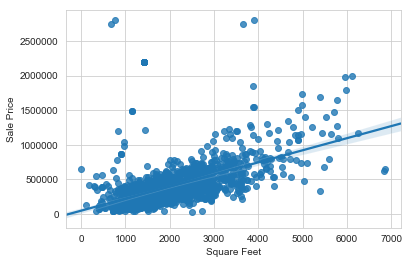

In [75]:
# Trendline showing positive correlation between square footage and sale price
ax = sns.regplot(x = "Square Feet", y = "Sale Price", data = combined)

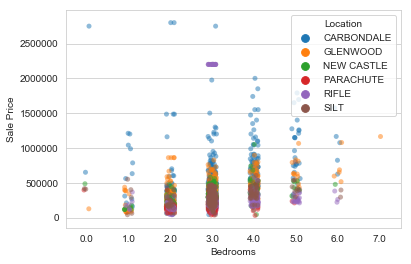

In [76]:
# Probably not the best plot, but shows the spread of number of bedrooms and sale price
ax = sns.stripplot(x = "Bedrooms", y = "Sale Price", hue="Location", data = combined, alpha=.5)

[None, None, None, None, None, None, None, None, None, None, None, None]

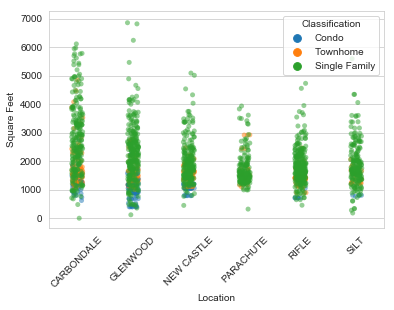

In [77]:
# Spread of square footage by location, for each home classification
ax = sns.stripplot(x = "Location", y = "Square Feet", hue="Classification", data = combined, alpha=.5)
plt.setp(ax.get_xticklabels(), rotation=45)

[None, None, None, None, None, None, None, None, None, None, None, None]

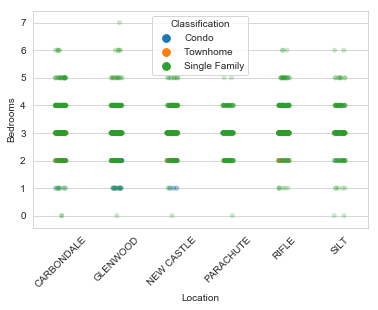

In [78]:
# Ignore this plot
ax = sns.stripplot(x = "Location", y = "Bedrooms", hue="Classification", data = combined, alpha=.25, jitter=True)
plt.setp(ax.get_xticklabels(), rotation=45)

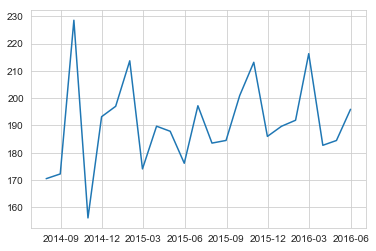

In [79]:
# Line plot in Seaborn using grouping by month - Price per Square Foot (mean)
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Price per SF'].mean()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()
sns.lineplot(data=monthly)

The line graph above shows a general upward trend in price per square foot during the two year period. However, it is important to keep in mind that mean values are more influenced by outliers than median values. A single sale of a multi-million dollar property, particularly during a month of lower sales per month, could have a larger impact on the mean price per square foot.

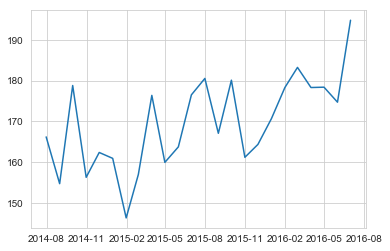

In [80]:
# Line plot in Seaborn using grouping by month - Price per Square Foot (median)
daily = combined.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Price per SF'].median()
monthly = daily.groupby(pd.Grouper(freq='M')).median()
sns.lineplot(data=monthly)

Plotting by median values, grouped per day and per month, tightens the range of values but still appears noisy.

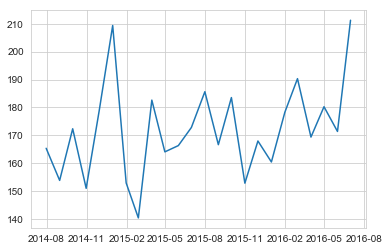

In [81]:
# Line plot in Seaborn using grouping by month - Price per Square Foot (median) for single family homes only
daily = single_fam.set_index('Sale Date').groupby(pd.Grouper(freq='D'))['Price per SF'].median()
monthly = daily.groupby(pd.Grouper(freq='M')).median()
sns.lineplot(data=monthly)

In [82]:
combined.to_csv('garfield_county_combined.csv')